In [1]:
%run -i Odometry.py
#%run -i Odometry_Private_Question.py

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-8.85191583e-03  1.99927562e-03  9.61885614e-01]
 [-3.01561251e-03  9.31457296e-03  1.92516230e+00]
 ...
 [ 4.70999438e+02 -4.58651557e+01  1.94391336e+02]
 [ 4.71024666e+02 -4.58674146e+01  1.94424557e+02]
 [ 4.70998608e+02 -4.58615380e+01  1.94395594e+02]] (801, 3)


In [2]:
import numpy as np

In [3]:
# read and and preprocess the groundtruth

with open('./video_train/gt_sequence.txt', 'r') as f:
  data = [line.strip().split() for line in f.readlines()]

In [4]:
path = np.load('predictions.npy') # Predictions 

In [5]:
# Evaluation based on average mean squared error between the predicted
# coordinates and the ground truth coordinates
gt_x = []
gt_y = []
gt_z = []
pred_x = []
pred_y = []
pred_z = []

mse_scores = []
for pred_coord, pose in zip(path, data):
    gt_coord = np.array([float(pose[3]), float(pose[7]), float(pose[11])])
    
    gt_x.append(gt_coord[0])
    gt_y.append(gt_coord[1])
    gt_z.append(gt_coord[2])
    
    pred_x.append(pred_coord[0])
    pred_y.append(pred_coord[1])
    pred_z.append(pred_coord[2])
    
    print(np.vstack([gt_coord,pred_coord]))
    print("")
    mse_scores.append(np.linalg.norm(pred_coord - gt_coord))

# You can expect to get less than 40 MSE
mse_scores = np.mean(mse_scores)
print('avg_mse scores', mse_scores)

[[-5.551115e-17 -3.330669e-16  2.220446e-16]
 [ 0.000000e+00  0.000000e+00  0.000000e+00]]

[[-0.01101102 -0.01712164  0.961713  ]
 [-0.00885192  0.00199928  0.96188561]]

[[-0.01699529 -0.03304158  1.924885  ]
 [-0.00301561  0.00931457  1.9251623 ]]

[[-0.03106702 -0.06341853  2.888054  ]
 [ 0.00579788  0.01434523  2.88885951]]

[[-0.04462738 -0.09503621  3.848312  ]
 [ 0.00773663  0.01263085  3.8497301 ]]

[[-5.33724200e-02 -1.22217300e-01  4.80655100e+00]
 [-1.94174166e-03  1.76011810e-02  4.80833268e+00]]

[[-0.06458549 -0.1448705   5.738958  ]
 [-0.04590507  0.02409256  5.74002297]]

[[-0.07542792 -0.1535673   6.676395  ]
 [-0.04691195  0.02203952  6.67756022]]

[[-0.08936429 -0.1678814   7.606157  ]
 [-0.04441668  0.0304912   7.60749507]]

[[-0.1013034  -0.1791661   8.535486  ]
 [-0.04627174  0.03681707  8.53694589]]

[[-0.1141317  -0.1865848   9.465868  ]
 [-0.05911558  0.03440072  9.46735411]]

[[-0.1275574  -0.1916301  10.38892   ]
 [-0.06308888  0.03104227 10.39050287]]

[[-0

In [6]:
import matplotlib.pyplot as plt

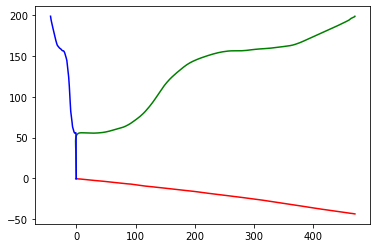

In [7]:
plt.plot(gt_x,gt_y,"r")
plt.plot(gt_x,gt_z,"g")
plt.plot(gt_y,gt_z,"b")
#plt.plot(pred_x,pred_y)
plt.show()

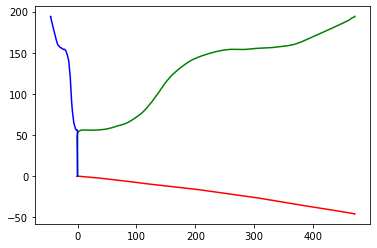

In [8]:
plt.plot(pred_x,pred_y,"r")
plt.plot(pred_x,pred_z,"g")
plt.plot(pred_y,pred_z,"b")
plt.show()

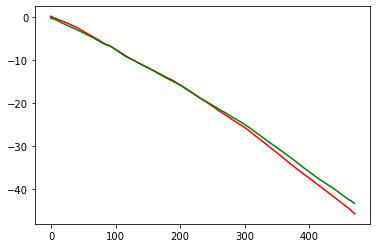

In [9]:
plt.plot(pred_x,pred_y,"r")
plt.plot(gt_x,gt_y,"g")
plt.show()

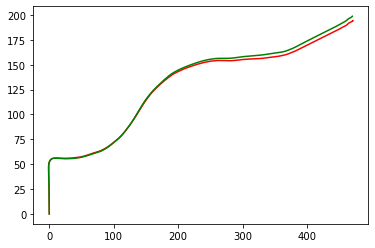

In [10]:
plt.plot(pred_x,pred_z,"r")
plt.plot(gt_x,gt_z,"g")
plt.show()

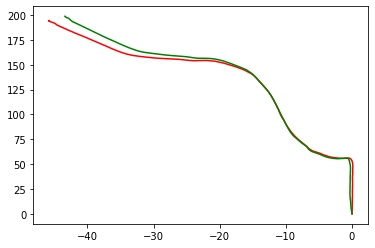

In [11]:
plt.plot(pred_y,pred_z,"r")
plt.plot(gt_y,gt_z,"g")
plt.show()

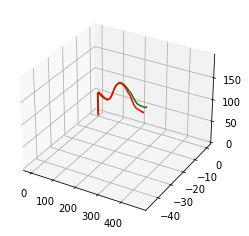

In [12]:
ax = plt.axes(projection='3d')
ax.plot3D(gt_x, gt_y, gt_z, color="green")
ax.plot3D(pred_x, pred_y, pred_z, color="red")
plt.show()